# imports 

In [42]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    ConfusionMatrixDisplay
)

# Human Resources employee survey 

In [18]:
hr = pd.read_csv('employee_survey.csv')
hr = hr.rename(columns={
    'time_spend_company': 'years_with_company',
    'Work_accident': 'work_accident',
    'Department': 'department'
})

In [19]:

hr.head(10) 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,years_with_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [20]:
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
years_with_company         int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [21]:
hr['left'].value_counts(dropna=False)

left
0    11428
1     3571
Name: count, dtype: int64

In [22]:
hr['left'].value_counts(normalize=True, dropna=False)

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

In [23]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   years_with_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# GB 1

quickly get feature importance and initial predictions with no preprocessing for this 1st model and use it as an initial baseline 

In [31]:
X1 = hr.drop(columns='left')
X1 = pd.get_dummies(X1, columns=['department', 'salary'])
y1 = hr['left']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [33]:
m1 = GradientBoostingClassifier(random_state=42)
m1.fit(X1_train, y1_train)

GradientBoostingClassifier(random_state=42)

In [41]:
# What are the most important features? 
feature_importances = pd.DataFrame({
    'feature': X1.columns,
    'importance': m1.feature_importances_
}).sort_values(by='importance', ascending=False)

feature_importances['importance'] = feature_importances['importance'].round(2)

feature_importances

,feature,importance
0,satisfaction_level,0.55
4,years_with_company,0.17
2,number_project,0.10
1,last_evaluation,0.10
3,average_montly_hours,0.07
5,work_accident,0.00
18,salary_low,0.00
17,salary_high,0.00
16,department_technical,0.00
7,department_IT,0.00


In [38]:
feature_importances = pd.DataFrame({
    'feature': X1.columns,
    'importance': m1.feature_importances_
})

feature_importances['importance'] = feature_importances['importance'].round(2)

In [43]:
y1_pred = m1.predict(X1_test)

## results: Gradient Booster 1 

Not bad with very little preprocessing

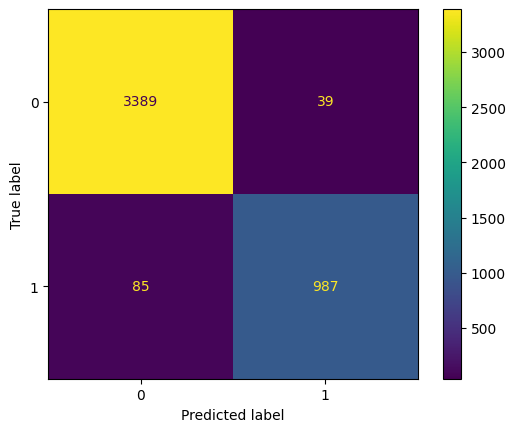

In [44]:
log_cm = confusion_matrix(y1_test, y1_pred)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)
log_disp.plot()